In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
zip_PATH = "/content/drive/MyDrive/train_data.zip"
save_PATH = "/content/drive/MyDrive/mobile_net_v2_1.h5"
load_PATH = '/content/train_data'
!unzip -q "/content/drive/MyDrive/train_data.zip"

In [ ]:
img_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
BATCH_SIZE = 40

train_ds = img_gen.flow_from_directory(directory = load_PATH , batch_size = BATCH_SIZE ,
                                       shuffle = True , class_mode = 'sparse' ,
                                       target_size = (299,299) , subset = 'training' , seed = 42)
val_ds = img_gen.flow_from_directory(directory = load_PATH , batch_size = BATCH_SIZE ,
                                     shuffle = False  , class_mode = 'sparse' ,
                                     target_size = (299,299) , subset = 'validation', seed = 42)

Found 7994 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.


In [ ]:
from keras.src.saving.saving_lib import optimizer
from keras.applications.mobilenet_v2 import MobileNetV2

num_classes = 10
base_model_1 = MobileNetV2(weights='imagenet' , include_top = False)
x = base_model_1.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)
model_1 = keras.Model(inputs=base_model_1.input, outputs=predictions)
model_1.compile(loss = 'sparse_categorical_crossentropy' ,
                     optimizer = 'sgd' , metrics = ['accuracy'])
for layer in model_1.layers[:100] :
  layer.trainable = False
for layer in model_1.layers[100:] :
  layer.trainable = True
check_inc_res = keras.callbacks.ModelCheckpoint(save_PATH, monitor='val_accuracy', save_best_only=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
history = model_1.fit(train_ds , validation_data = val_ds , epochs = 30 , callbacks=[check_inc_res] )

Epoch 1/30
 47/200 [======>.......................] - ETA: 38:51 - loss: 2.1349 - accuracy: 0.2394

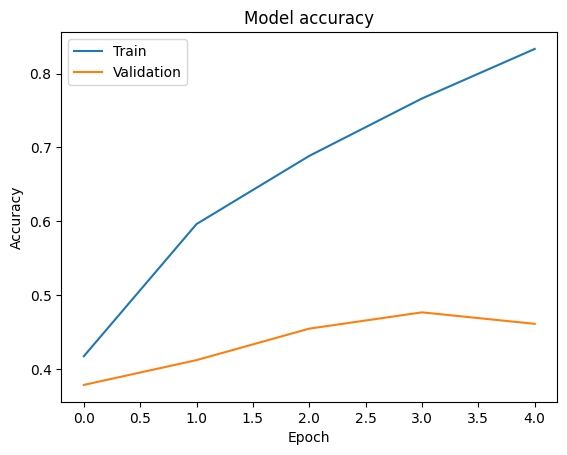

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


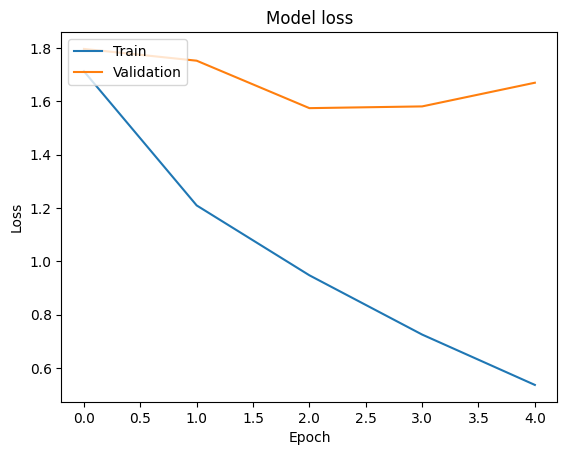

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_final = keras.models.load_model(save_PATH)
test_ds = keras.utils.image_dataset_from_directory('/content/test_data' , labels = None)

In [ ]:
y_predic = model_final.predict(test_ds)
y_predict_final = []
for i in y_predic :
  res = np.argmax(i) + 1
  y_predict_final.append(res)

In [ ]:
print(y_predict_final)

In [ ]:
pd.DataFrame(y_predict_final).to_csv("/content/drive/MyDrive/mobile_net_1.csv")